# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

# 시작 이전에 맛보기 실습을 해볼게요.

In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud mecab-ko

In [11]:
## import sklearn
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import tensorflow as tf
fm.findSystemFonts()
plt.rcParams['font.family']= ["Malgun Gothic"]
plt.rcParams["axes.unicode_minus"]=False

# GPU 환경 설정하기
# assert tf.test.is_gpu_available() == True, 'GPU 설정을 확인하세요.'
print(tf.config.list_physical_devices('GPU'))
print(tf.config.list_logical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


## Tutorial data - 대한민국 헌법

In [2]:
import nltk
from eunjeon import Mecab
from konlpy.corpus import kolaw
constitution = kolaw.open('constitution.txt').read()
mecab = Mecab()

### 1. tokenization
#### 1-1. 형태소 추출

In [3]:
# mecab을 이용해 문장을 명사단위로 토큰화 합니다.
# nouns 함수를 이용합니다.
# mecab 이용시 한글의 경우 띄어쓰기를 하지 않아도 추출이 가능합니다. 
morphs_constitution = mecab.morphs(constitution)
print(len(morphs_constitution))
morphs_constitution[:10]

9286


['대한민국', '헌법', '유구', '한', '역사', '와', '전통', '에', '빛나', '는']

#### 1-2. 명사 추출

In [4]:
# 형태소 단위로 토큰화 해 봅니다.
nouns_constitution = mecab.nouns(constitution)
print(len(nouns_constitution))
nouns_constitution[:10]

3610


['대한민국', '헌법', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시']

## 2. Part Of Speech tagging(품사 태깅)

In [7]:
pos_constitution = mecab.pos(constitution)
print(len(pos_constitution))
print(pos_constitution[:3])
# print(mecab.pos(constitution,flatten=False)[:3])
# print(mecab.pos(constitution,join=True)[:3])

9286
[('대한민국', 'NNP'), ('헌법', 'NNG'), ('유구', 'XR')]


## 3. [NLTK](https://www.nltk.org/book/)

In [8]:
from nltk import bigrams

In [9]:
nltk_morphs_constitution = nltk.Text(morphs_constitution)
nltk_nouns_constitution = nltk.Text(nouns_constitution)

### 3-1. Frequency plot

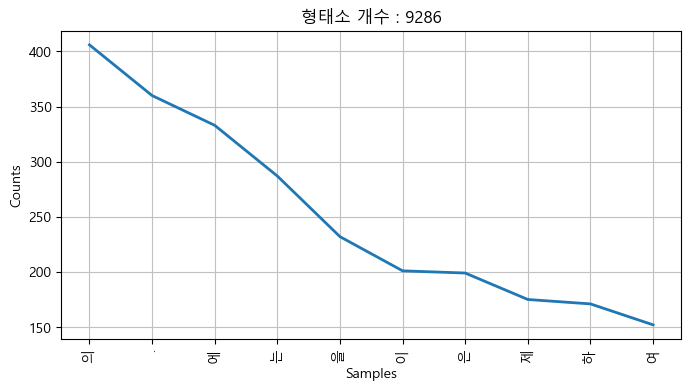

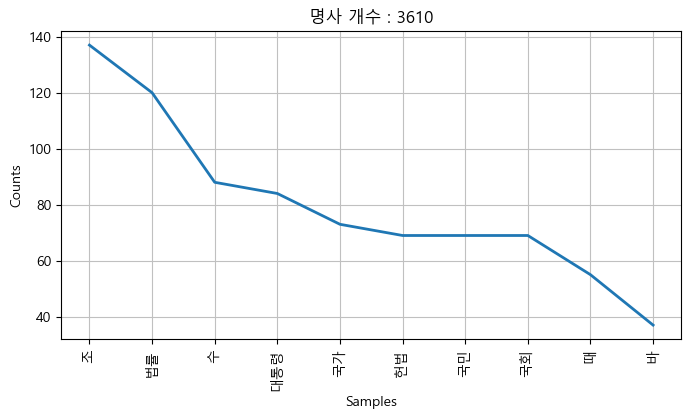

In [12]:
plt.figure(figsize=(8,4))
plt.title("형태소 개수 : " + str(len(nltk_morphs_constitution.tokens)))
nltk_morphs_constitution.plot(10)

plt.figure(figsize=(8,4))
plt.title("명사 개수 : " + str(len(nltk_nouns_constitution.tokens)))
nltk_nouns_constitution.plot(10)

plt.show()

### 3-2. Similar words

In [13]:
nltk_morphs_constitution.similar('국민')

국회 국가 대한민국 정부 조국 법관 법원 타인 판결 근로 국회의원 대통령 대법원장 법령 농지 정치 책임 인 차 권력


In [14]:
nltk_nouns_constitution.similar('국민')

국회 법률 대통령 대한민국 지향 이 법관 근로자 국회의원 과반수 제안


### 3-3. Lexical dispersion_plot

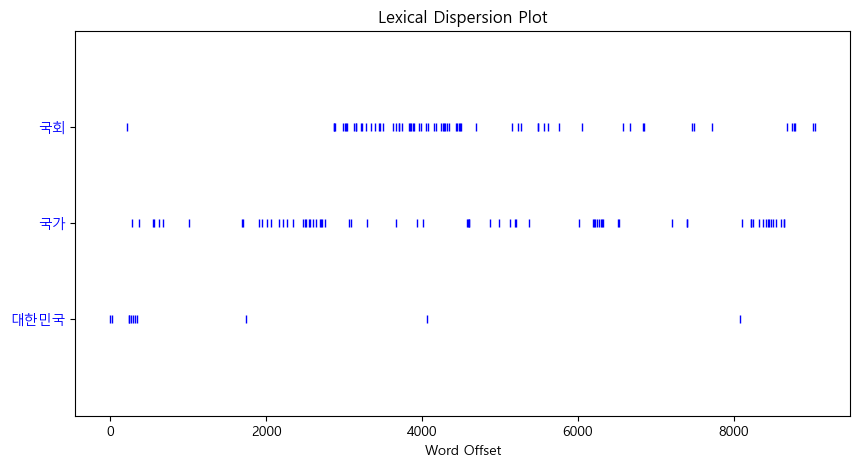

In [15]:
plt.figure(figsize=(10,5))
nltk_morphs_constitution.dispersion_plot(['국회','국가','대한민국',])
plt.show()

# plt.figure(figsize=(10,5))
# nltk_nouns_constitution.dispersion_plot(['국회','국가','대한민국',])
# plt.show()

In [16]:
nltk_morphs_constitution.concordance('국회',width=20,lines=5)

Displaying 5 of 69 matches:
 헌법 을 이제 국회 의 의결 을 거
 . 제 3 장 국회 제 40 조 입
조 입법 권 은 국회 에 속한다 . 
제 41 조 ① 국회 는 국민 의 보
고 는 회기 중 국회 의 동의 없이 


In [17]:
nltk_nouns_constitution.concordance('국회',width=20,lines=5)

Displaying 5 of 69 matches:
 차 개정 헌법 국회 의결 국민 투표
 이익 처우 장 국회 조 입법 국회 
 국회 조 입법 국회 조 국회 국민 
 입법 국회 조 국회 국민 보통 평등
 제외 회기 중 국회 동의 체포 구금


In [18]:
nltk_nouns_constitution.index('국회')

83

### 3-5. Collocation

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\master\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
nltk_morphs_constitution.collocations(window_size=5)
print("*"*50)
nltk_nouns_constitution.collocations(window_size=5)

재판소 재판관; 단체교섭 단체행동권; 가진다 피고인; 대법원장 대법관; 단체행동권 가진다; 대통령 국무총리; 아니한다
국회의원; 국무총리 대통령; 재판관 대통령
**************************************************
재판소 재판관; 단체교섭 단체행동권; 대법원장 대법관; 국회의원 선거후; 국무총리 행정각부; 대법관 대법관; 국회의원
국회의원; 공무원 기업체; 공무원 후임자; 대법관 대법원장; 국무총리 대통령; 대통령 국무총리; 대통령 행정각부; 재판관
재판관; 과반수 과반수; 대통령 당선자; 대통령 법률안; 법률안 대통령; 후임자 대통령; 재판관 대통령


## 4. [WordCloud](https://amueller.github.io/word_cloud/)

In [22]:
type(nltk_nouns_constitution)

nltk.text.Text

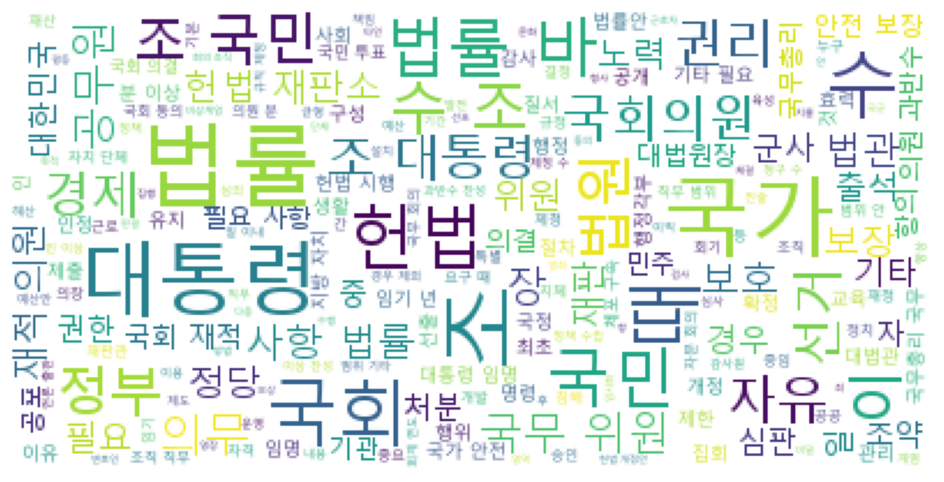

In [24]:
import matplotlib.font_manager as font_manager
from wordcloud import WordCloud

NGC_path = font_manager.findfont('Malgun Gothic')
# wc = WordCloud(font_path=NGC_path,max_font_size=40).generate(constitution)
wc = WordCloud(font_path=NGC_path,max_font_size=40,background_color="white").generate(' '.join(nltk_nouns_constitution))

plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

## 5. vocabulary 만들기

지금부터는 단어사전을 만드는 원리에 대해 이해하는 실습을 해보도록 하겠습니다.<br>
아래 로직을 이해 하셨다가, 잠시 후 실습 때 직접 만들어 보시기 바랍니다.
> 1. 단어를 토큰화 하고, 하나의 리스트 만듭니다.
> 2. 중복된 단어는 제거하고 토큰의 출현 빈도 순으로 내림차순 정렬 합니다.
> 3. 각 토큰에 정수를 부여하고 dictionary 생성합니다.

#### 5-1. pos function 응용

In [25]:
# 명사는 nouns라는 함수를 이용하면 쉽게 추출이 가능한데요.
# 특수기호는 형태소 분석을 한 후에 추출을 해야 합니다. 
# 특수기호까지 추출하는 함수를 만들어 보겠습니다.

def extended_extraction(text):
    pos = mecab.pos(text)
    extended_list = []
    for i in range(len(pos)):
        # 명사 : NP, NNB, NNP, NNG
        # 특수기호 : SF, SY
        if pos[i][1] in('NP','NNB','NNP','NNG','SF','SY'):
            extended_list.append(pos[i][0])
    return extended_list

# 새로 만든 함수를 이용하여 문장의 명사와 특수기호만을 추출해서 토큰화 합니다.
# 이 함수를 이용해서 나중에 dictionary를 만들때와 문자를 숫자열로 변환하는 작업을 실습 해보시기 바랍니다.
token_list = extended_extraction(constitution)
token_list[:10]

['대한민국', '헌법', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시']

#### 5-2. Count frequency and sorting

In [26]:
# 2. 토큰의 출현 빈도 순으로 내림차순 정렬합니다.
# 데이터 갯수를 셀 때, 유용한 collections모듈의 Counter클래스와 most_common 함수를 이용합니다.
# most_common을 이용하면 데이터 갯수가 많은 순으로 정렬된 배열이 리턴 됩니다.
# collections모듈의 Counter클래스를 import 합니다.
from collections import Counter

# Counter 클레스를 이용하여 토큰의 빈도를 계산 합니다.
vocab_collection = Counter(token_list)

# 결과를 출력해 확인합니다.
print("고유한 토큰 갯수 : ",len(vocab_collection))
# print("토큰 목록: ", vocab_collection)

# most_common 함수 이용해서 토큰을 빈도가 높은 순으로 정렬한 배열을 얻습니다.
vocab = vocab_collection.most_common(len(vocab_collection))
print("빈도순으로 정렬 :",vocab)

고유한 토큰 갯수 :  859
빈도순으로 정렬 : [('.', 360), ('법률', 120), ('수', 88), ('대통령', 84), ('조', 78), ('①', 78), ('②', 78), ('국가', 73), ('헌법', 69), ('국민', 69), ('국회', 69), ('때', 55), ('③', 45), ('바', 37), ('필요', 31), ('위원', 30), ('기타', 26), ('법원', 25), ('보장', 24), ('국무', 24), ('정부', 23), ('사항', 23), ('이', 22), ('회의', 22), ('자유', 21), ('권리', 21), ('선거', 21), ('의원', 21), ('경제', 20), ('④', 20), ('국회의원', 20), ('의무', 19), ('직무', 19), ('국무총리', 19), ('임명', 19), ('조직', 18), ('이상', 18), ('임기', 18), ('의결', 17), ('공무원', 17), ('경우', 17), ('장', 16), ('범위', 16), ('보호', 15), ('법관', 15), ('정책', 14), ('정당', 14), ('재판소', 14), ('재적', 14), ('항의', 14), ('노력', 13), ('재판', 13), ('인', 13), ('요구', 13), ('집회', 12), ('군사', 12), ('시행', 12), ('과반수', 12), ('출석', 12), ('찬성', 12), ('자문', 12), ('대한민국', 11), ('안', 11), ('안전', 11), ('조약', 11), ('심판', 11), ('자', 11), ('⑤', 11), ('중', 11), ('처분', 11), ('단체', 11), ('동의', 11), ('탄핵', 11), ('권한', 11), ('민주', 10), ('공포', 10), ('기관', 10), ('중요', 10), ('재판관', 10), ('대법원장', 10), ('사회', 9), (

In [27]:
#  most_common 함수 이용해서 토큰을 빈도가 높은 top five를 구해보세요.
## 실습해보세요
vocab_five = vocab[:5]
print(vocab_five)

[('.', 360), ('법률', 120), ('수', 88), ('대통령', 84), ('조', 78)]


#### 5-3. mapping string from integer

In [28]:
# 3. 각 토큰에 정수를 부여하고 dict type의 dictionary를 생성합니다.
dic = {}
i = 0
for (word, frequency) in vocab :
    i +=1 
    dic[word] = i
print("dic :", dic)

dic : {'.': 1, '법률': 2, '수': 3, '대통령': 4, '조': 5, '①': 6, '②': 7, '국가': 8, '헌법': 9, '국민': 10, '국회': 11, '때': 12, '③': 13, '바': 14, '필요': 15, '위원': 16, '기타': 17, '법원': 18, '보장': 19, '국무': 20, '정부': 21, '사항': 22, '이': 23, '회의': 24, '자유': 25, '권리': 26, '선거': 27, '의원': 28, '경제': 29, '④': 30, '국회의원': 31, '의무': 32, '직무': 33, '국무총리': 34, '임명': 35, '조직': 36, '이상': 37, '임기': 38, '의결': 39, '공무원': 40, '경우': 41, '장': 42, '범위': 43, '보호': 44, '법관': 45, '정책': 46, '정당': 47, '재판소': 48, '재적': 49, '항의': 50, '노력': 51, '재판': 52, '인': 53, '요구': 54, '집회': 55, '군사': 56, '시행': 57, '과반수': 58, '출석': 59, '찬성': 60, '자문': 61, '대한민국': 62, '안': 63, '안전': 64, '조약': 65, '심판': 66, '자': 67, '⑤': 68, '중': 69, '처분': 70, '단체': 71, '동의': 72, '탄핵': 73, '권한': 74, '민주': 75, '공포': 76, '기관': 77, '중요': 78, '재판관': 79, '대법원장': 80, '사회': 81, '기본': 82, '정치': 83, '개정': 84, '효력': 85, '체포': 86, '절차': 87, '행위': 88, '교육': 89, '근로': 90, '국정': 91, '명령': 92, '지방': 93, '자치': 94, '질서': 95, '생활': 96, '제정': 97, '투표': 98, '인정': 99, '구속': 100, '형사'